In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv('data/Training.csv')

In [4]:
# Inspect the data
print(data.head())
print(data.info())
print(data.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2

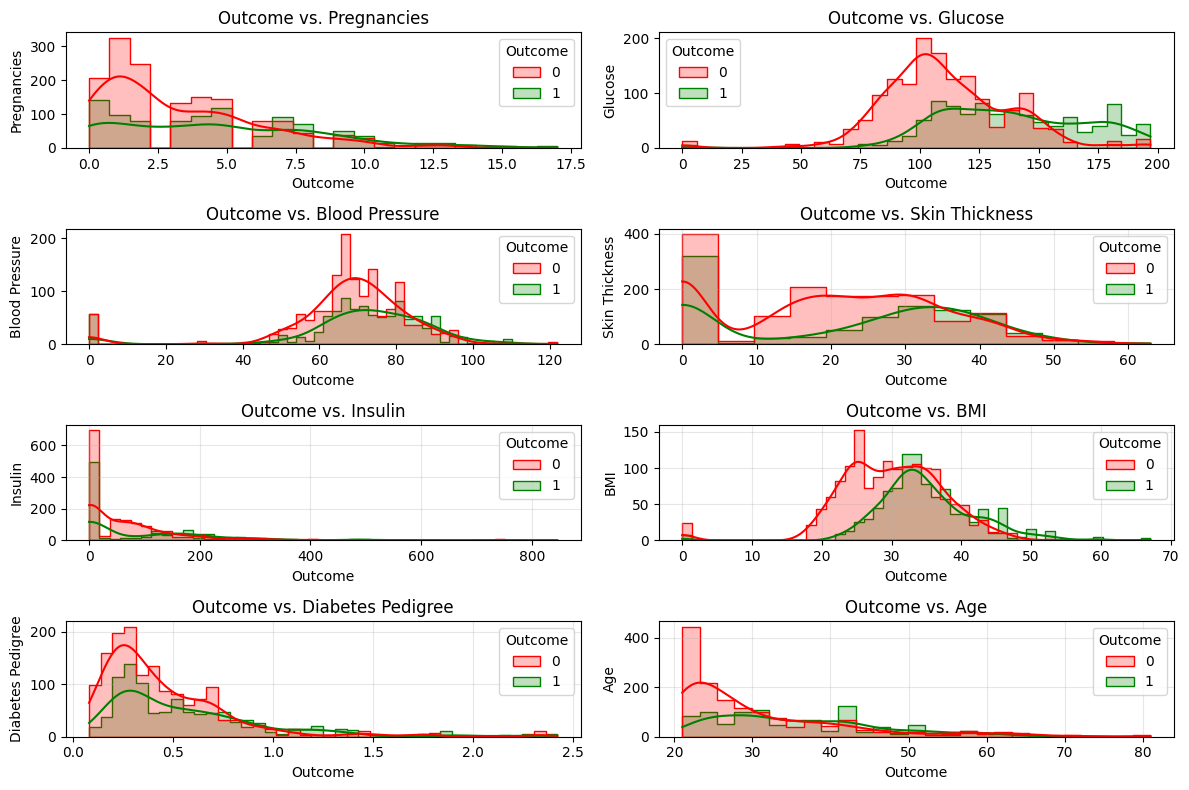

In [5]:
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 8))

# Plot Outcome vs. Pregnancies
sns.histplot(ax=axes[0,0], data=data, x='Pregnancies', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[0, 0].set_xlabel('Outcome')
axes[0, 0].set_ylabel('Pregnancies')
axes[0, 0].set_title('Outcome vs. Pregnancies')

# Plot Outcome vs. Glucose
sns.histplot(ax=axes[0,1], data=data, x='Glucose', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[0, 1].set_xlabel('Outcome')
axes[0, 1].set_ylabel('Glucose')
axes[0, 1].set_title('Outcome vs. Glucose')

# Plot Outcome vs. BloodPressure
sns.histplot(ax=axes[1,0], data=data, x='BloodPressure', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[1, 0].set_xlabel('Outcome')
axes[1, 0].set_ylabel('Blood Pressure')
axes[1, 0].set_title('Outcome vs. Blood Pressure')

# Plot Outcome vs. SkinThickness
sns.histplot(ax=axes[1,1], data=data, x='SkinThickness', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[1, 1].set_xlabel('Outcome')
axes[1, 1].set_ylabel('Skin Thickness')
axes[1, 1].set_title('Outcome vs. Skin Thickness')
axes[1, 1].grid(alpha=0.3)

# Plot Outcome vs. Insulin
sns.histplot(ax=axes[2,0], data=data, x='Insulin', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[2, 0].set_xlabel('Outcome')
axes[2, 0].set_ylabel('Insulin')
axes[2, 0].set_title('Outcome vs. Insulin')
axes[2, 0].grid(alpha=0.3)

# Plot Outcome vs. BMI
sns.histplot(ax=axes[2,1], data=data, x='BMI', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[2, 1].set_xlabel('Outcome')
axes[2, 1].set_ylabel('BMI')
axes[2, 1].set_title('Outcome vs. BMI')
axes[2, 1].grid(alpha=0.3)

# Plot Outcome vs. DiabetesPedigreeFunction
sns.histplot(ax=axes[3,0], data=data, x='DiabetesPedigreeFunction', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[3, 0].set_xlabel('Outcome')
axes[3, 0].set_ylabel('Diabetes Pedigree')
axes[3, 0].set_title('Outcome vs. Diabetes Pedigree')
axes[3, 0].grid(alpha=0.3)

# Plot Outcome vs. Age
sns.histplot(ax=axes[3,1], data=data, x='Age', hue='Outcome', kde=True, element='step', palette=['red', 'green'])
axes[3, 1].set_xlabel('Outcome')
axes[3, 1].set_ylabel('Age')
axes[3, 1].set_title('Outcome vs. Age')
axes[3, 1].grid(alpha=0.3)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [6]:
data['SkinThickness'].value_counts()[0]

717

In [7]:
data['Insulin'].value_counts()[0]

1181

Generally speaking, diabetes diagnosis seems more common at the high (right) ends of many of these features, particularly glucose level and BMI. There is enough of a relationship to warrant testing all predictors in our models.

Both skin thickness and insulin have a large presence of 0 as a value, which seems to mean null. As a result, they may worsen the performance of the model.

In [8]:
# Define predictors and response variable
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

In [9]:
# Create training and testing sets, with 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale predictors
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Models

### Logistic Regression

In [10]:
# Instantiate the logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model on the training set
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Predict probabilities and classes
lr_y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
lr_y_pred = lr_model.predict(X_test)

Logistic Regression Model Precision: 0.70
Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       305
           1       0.70      0.51      0.59       187

    accuracy                           0.73       492
   macro avg       0.72      0.69      0.69       492
weighted avg       0.73      0.73      0.72       492



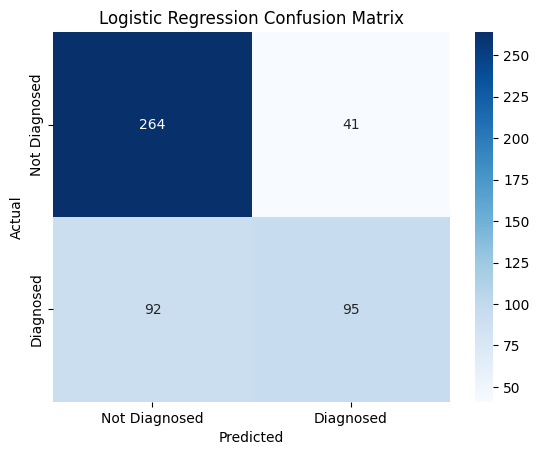

In [12]:
# Precision Test
lr_precision = precision_score(y_test, lr_y_pred)
print(f"Logistic Regression Model Precision: {lr_precision:.2f}")

# Evaluate the model
print("Logistic Regression Model Performance:")
print(classification_report(y_test, lr_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### k-NN

In [13]:
# Covariance matrix for Mahalanobis distance
cov = np.cov(X_train_scaled, rowvar=False)

# Parameter grid for other metrics
param_grid = {
    'n_neighbors': list(range(1,31,2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['auto']
}

# Create standard KNN model
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [14]:
# Get best parameters and score
standard_best_params = grid_search.best_params_
standard_best_score = grid_search.best_score_
print(f"Best parameters (standard metrics): {standard_best_params}")
print(f"Best cross-validation accuracy: {standard_best_score:.4f}")

Best parameters (standard metrics): {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation accuracy: 0.9911


In [15]:
# Mahalanobis
# Create a custom object to include covariance matrix as special parameter
knn_mahalanobis = KNeighborsClassifier(metric='mahalanobis', metric_params={'VI': cov})

# Parameters for Mahalanobis
param_grid_mahalanobis = {
   'n_neighbors': list(range(1, 31, 2)),
   'weights': ['uniform', 'distance'],
   'algorithm': ['auto']
}

# Perform grid search for Mahalanobis
print("\nStarting grid search for Mahalanobis metric...")
grid_search_mahalanobis = GridSearchCV(knn_mahalanobis, param_grid_mahalanobis, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mahalanobis.fit(X_train_scaled, y_train)


Starting grid search for Mahalanobis metric...


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='mahalanobis',
                                            metric_params={'VI': array([[ 1.00050839,  0.18384863,  0.11705413, -0.01307308, -0.03959691,
         0.10774872, -0.05204733,  0.53846737],
       [ 0.18384863,  1.00050839,  0.11900316,  0.059243  ,  0.36162855,
         0.25872872,  0.16884584,  0.26724548],
       [ 0.11705413,  0.11900316,  1.00050839,  0.20955844,  0.09705351,
         0.24511422,  0.006...
         1.00050839,  0.12373139,  0.0728176 ],
       [-0.05204733,  0.16884584,  0.0062259 ,  0.17546884,  0.24628067,
         0.12373139,  1.00050839,  0.04392786],
       [ 0.53846737,  0.26724548,  0.20914535, -0.11853036, -0.01577956,
         0.0728176 ,  0.04392786,  1.00050839]])}),
             n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
# Get best parameters and score
mahalanobis_best_params = grid_search_mahalanobis.best_params_
mahalanobis_best_score = grid_search_mahalanobis.best_score_
print(f"Best parameters (Mahalanobis): {mahalanobis_best_params}")
print(f"Best cross-validation accuracy: {mahalanobis_best_score:.4f}")

Best parameters (Mahalanobis): {'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance'}
Best cross-validation accuracy: 0.9934


In [17]:
# Determine overall best model
best_scores = {
    'Standard': (standard_best_score, standard_best_params),
    'Mahalanobis': (mahalanobis_best_score, mahalanobis_best_params)
}

best_model_type = max(best_scores, key=lambda k: best_scores[k][0])
best_score = best_scores[best_model_type][0]
best_params = best_scores[best_model_type][1]

print(f"\nOverall best model: {best_model_type}")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


Overall best model: Mahalanobis
Best parameters: {'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance'}
Best cross-validation accuracy: 0.9934


In [19]:
knn_model = grid_search_mahalanobis.best_estimator_

knn_y_pred = knn_model.predict(X_test_scaled)

k-NN Tree Model Precision: 0.99
k-NN Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       305
           1       0.99      0.97      0.98       187

    accuracy                           0.99       492
   macro avg       0.99      0.98      0.98       492
weighted avg       0.99      0.99      0.99       492



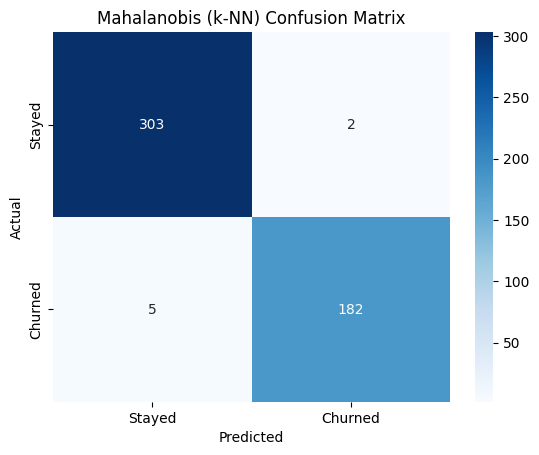

In [39]:
# Precision Test
knn_precision = precision_score(y_test, knn_y_pred)
print(f"k-NN Tree Model Precision: {knn_precision:.2f}")

# Evaluate the model
print("k-NN Model Performance:")
print(classification_report(y_test, knn_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Mahalanobis (k-NN) Confusion Matrix')
plt.show()

### Decision Tree

In [30]:
# Create and train the decision tree
# Instantiate model
dt_model = DecisionTreeClassifier(
   max_depth=3,
   min_samples_leaf=2,
   random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

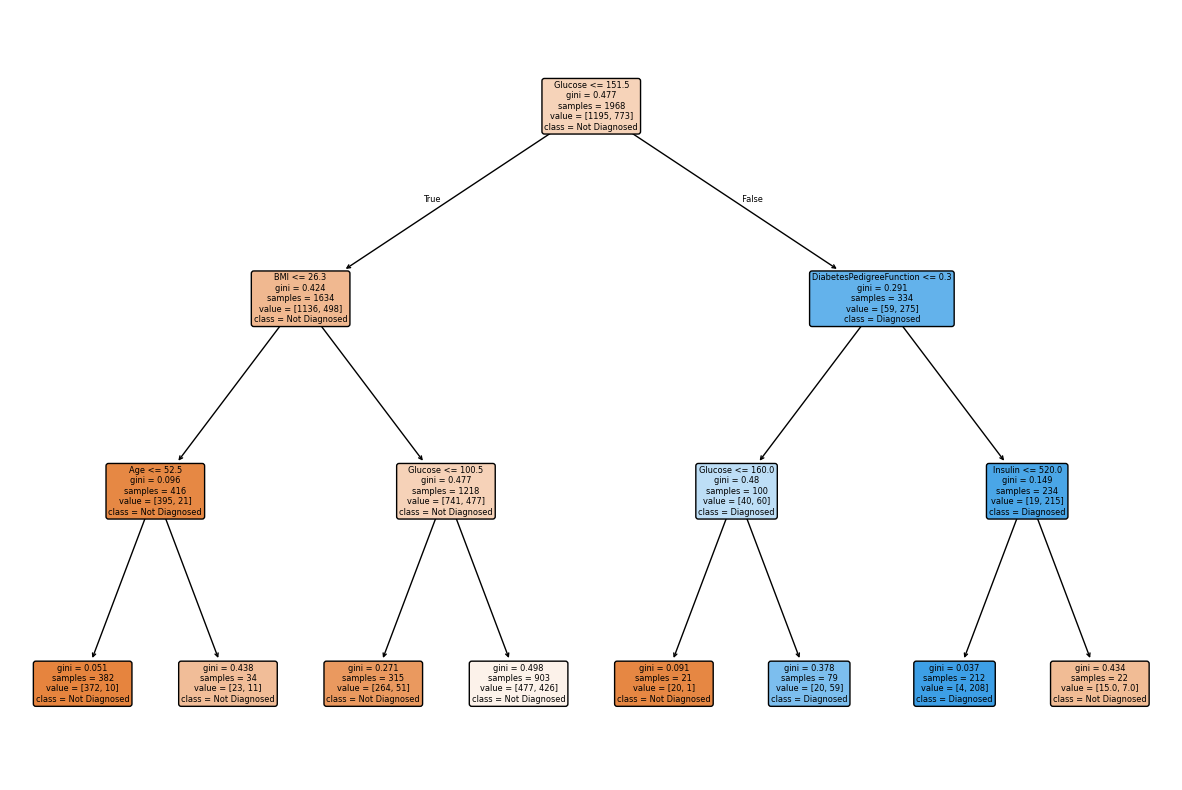


Feature Importance:
                    feature  importance
1                   Glucose    0.657597
5                       BMI    0.225779
4                   Insulin    0.054805
6  DiabetesPedigreeFunction    0.044548
7                       Age    0.017271
0               Pregnancies    0.000000
2             BloodPressure    0.000000
3             SkinThickness    0.000000

Feature: Pregnancies
Importance Score: 0.000
Used in 0 nodes

Feature: Glucose
Importance Score: 0.658
Used in 3 nodes

Feature: BloodPressure
Importance Score: 0.000
Used in 0 nodes

Feature: SkinThickness
Importance Score: 0.000
Used in 0 nodes

Feature: Insulin
Importance Score: 0.055
Used in 1 nodes

Feature: BMI
Importance Score: 0.226
Used in 1 nodes

Feature: DiabetesPedigreeFunction
Importance Score: 0.045
Used in 1 nodes

Feature: Age
Importance Score: 0.017
Used in 1 nodes


In [31]:
# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Visualize the tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, 
          feature_names=X.columns,
          class_names=['Not Diagnosed', 'Diagnosed'],
          filled=True,
          rounded=True)
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Extract feature importance from model and align with feature columns
for feature, importance in zip(X.columns, dt_model.feature_importances_):
   n_nodes = sum([1 for i in range(dt_model.tree_.node_count)
                  if dt_model.tree_.feature[i] == X.columns.get_loc(feature)])
  
   print(f"\nFeature: {feature}")
   print(f"Importance Score: {importance:.3f}")
   print(f"Used in {n_nodes} nodes")

Decision Tree Model Precision: 0.90
Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.70      0.98      0.81       305
           1       0.90      0.30      0.45       187

    accuracy                           0.72       492
   macro avg       0.80      0.64      0.63       492
weighted avg       0.77      0.72      0.68       492



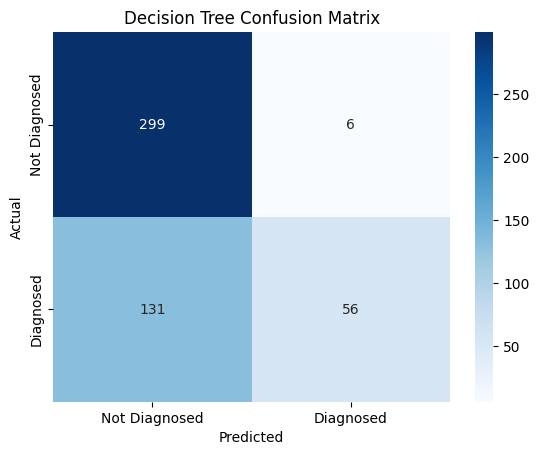

In [32]:
# Precision Test
dt_precision = precision_score(y_test, dt_y_pred)
print(f"Decision Tree Model Precision: {dt_precision:.2f}")

# Evaluate the model
print("Decision Tree Model Performance:")
print(classification_report(y_test, dt_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Random Forest

In [33]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions
rf_y_pred = rf_model.predict(X_test)

Decision Tree Model Precision: 1.00
Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      0.99      1.00       187

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



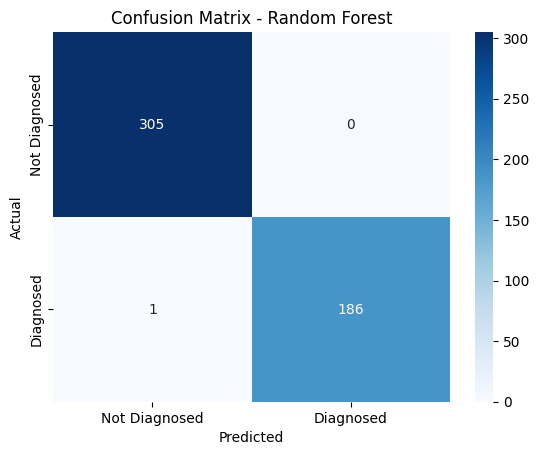

In [35]:
# Precision Test
rf_precision = precision_score(y_test, rf_y_pred)
print(f"Decision Tree Model Precision: {rf_precision:.2f}")

# Evaluate the model
print("Random Forest Model Performance:")
print(classification_report(y_test, rf_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### XGBoost

In [36]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric="logloss", verbosity=0) # verbosity = 0 to not print warnings
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

XGBoost Model Precision: 0.92
XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       305
           1       0.92      0.83      0.87       187

    accuracy                           0.91       492
   macro avg       0.91      0.89      0.90       492
weighted avg       0.91      0.91      0.91       492



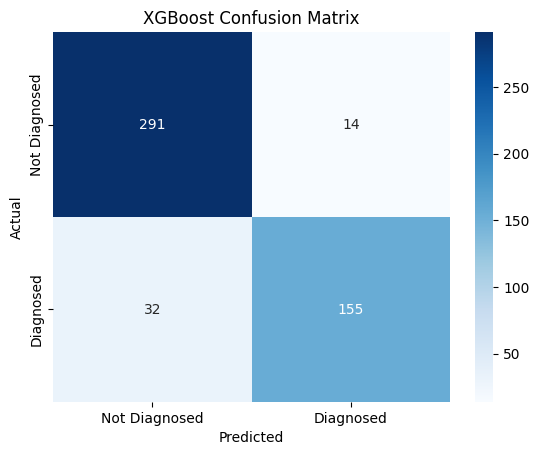

In [38]:
# Precision Test
xgb_precision = precision_score(y_test, xgb_y_pred)
print(f"XGBoost Model Precision: {xgb_precision:.2f}")

# Evaluate XGBoost model
print("XGBoost Model Performance:")
print(classification_report(y_test, xgb_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, xgb_y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diagnosed', 'Diagnosed'], yticklabels=['Not Diagnosed', 'Diagnosed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Comparison

As we are concerned primarily with precision, we can evaluate our performance by comparing the precision score of our various models.

In [41]:
print(f"Logistic Regression Model Precision: {lr_precision:.2f}")
print(f"k-NN Model Precision: {knn_precision:.2f}")
print(f"Decision Tree Model Precision: {dt_precision:.2f}")
print(f"Random Forest Model Precision: {rf_precision:.2f}")
print(f"XGBoost Model Precision: {xgb_precision:.2f}")

Logistic Regression Model Precision: 0.70
k-NN Model Precision: 0.99
Decision Tree Model Precision: 0.90
Random Forest Model Precision: 1.00
XGBoost Model Precision: 0.92


From this, we see that k-NN and Random Forest both performed exceptionally well, with straightforward logistic regression being by far the weakest. While the performance of Random Forest over k-NN is more accurate, we can test our models against a new dataset to see if the same results of their performance remain.

# Testing

In [42]:
test_set = pd.read_csv('data/Testing.csv')

In [43]:
# Inspect the data
print(test_set.head())
print(test_set.info())
print(test_set.columns)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            9      120             72             22       56  20.8   
1            1       71             62              0        0  21.8   
2            8       74             70             40       49  35.3   
3            5       88             78             30        0  27.6   
4           10      115             98              0        0  24.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.733   48        0  
1                     0.416   26        0  
2                     0.705   39        0  
3                     0.258   37        0  
4                     1.022   34        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               308 non-null    int64  
 1   Glucose                   308

In [45]:
# Define predictors and response variable
testing_X = test_set[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
testing_y = test_set['Outcome']

testing_X_scaled = pd.DataFrame(scaler.fit_transform(testing_X), columns=testing_X.columns)

In [47]:
# Logistic Regression
testing_lr_y_pred_proba = lr_model.predict_proba(testing_X)[:, 1]
testing_lr_y_pred = lr_model.predict(testing_X)
testing_lr_precision = precision_score(testing_y, testing_lr_y_pred)

# k-NN
testing_knn_y_pred = knn_model.predict(testing_X_scaled)
testing_knn_precision = precision_score(testing_y, testing_knn_y_pred)

# Decision Tree
testing_dt_y_pred = dt_model.predict(testing_X)
testing_dt_precision = precision_score(testing_y, testing_dt_y_pred)

# Random Forest
testing_rf_y_pred = rf_model.predict(testing_X)
testing_rf_precision = precision_score(testing_y, testing_rf_y_pred)

# XGBoost
testing_xgb_y_pred = xgb_model.predict(testing_X)
testing_xgb_precision = precision_score(testing_y, testing_xgb_y_pred)

In [48]:
print('Testing Set Performance')
print(f"Logistic Regression Model Precision: {testing_lr_precision:.2f}")
print(f"k-NN Model Precision: {testing_knn_precision:.2f}")
print(f"Decision Tree Model Precision: {testing_dt_precision:.2f}")
print(f"Random Forest Model Precision: {testing_rf_precision:.2f}")
print(f"XGBoost Model Precision: {testing_xgb_precision:.2f}")

Testing Set Performance
Logistic Regression Model Precision: 0.71
k-NN Model Precision: 0.58
Decision Tree Model Precision: 0.72
Random Forest Model Precision: 0.66
XGBoost Model Precision: 0.65


The performance ends up being much poorer overall against this new dataset, and even the proportional performance is not the same. The dataset is fairly small, so we might need to continue to refine the model, perferably by being able to add on to our input data.